# Arbol de decision como regresor
Usaremos un arbol de decision como regresor para predecir el precio de una casa dependiendo de su area

RMSE en el conjunto de prueba: 11,372.40
RMSE en el conjunto de prueba: 0.97


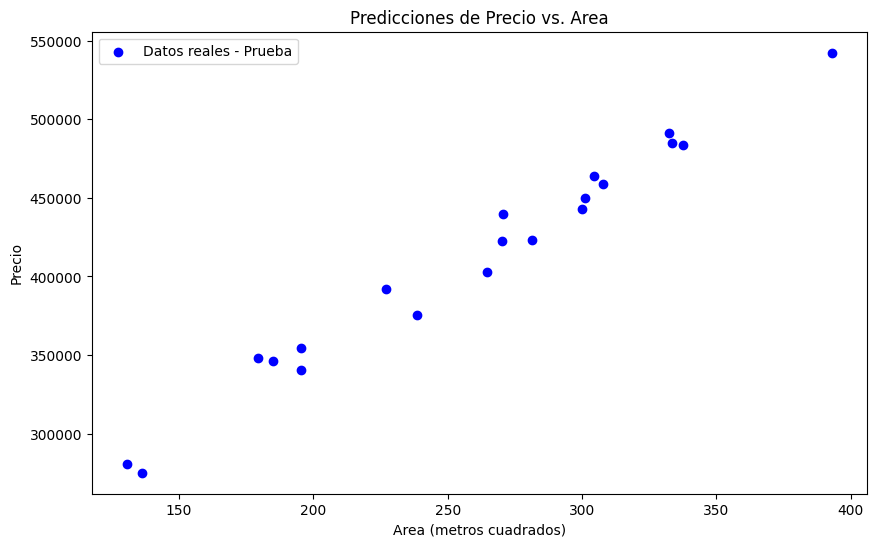

In [30]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Establecer una semilla para la reproducibilidad
np.random.seed(0)

# Generar datos sintéticos con una relación creciente entre área y precio
n_registros = 100  # Número de registros

# Generar áreas crecientes
areas = np.random.uniform(100, 400, n_registros)

# Definir una relación no lineal entre área y precio
precio_base = 150000
precio_factor = 1000
precio = precio_base + precio_factor * areas + np.random.normal(0, 10000, n_registros)

# Crear un DataFrame con los datos generados
data = {'Area': areas, 'Precio': precio}
df = pd.DataFrame(data)

# Seleccionar la característica "Area" como entrada (X) y el precio como etiqueta (y)
X = df[['Area']]
y = df['Precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión de árbol de decisión
regression_tree = DecisionTreeRegressor(max_depth = 10)

# Entrenar el modelo con los datos de entrenamiento
regression_tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = regression_tree.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print(f"RMSE en el conjunto de prueba: {np.sqrt(mse):,.2f}")
print(f"RMSE en el conjunto de prueba: {r2:,.2f}")

# Visualizar el gráfico de dispersión junto con las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales - Prueba')
#plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel("Area (metros cuadrados)")
plt.ylabel("Precio")
plt.title("Predicciones de Precio vs. Area")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


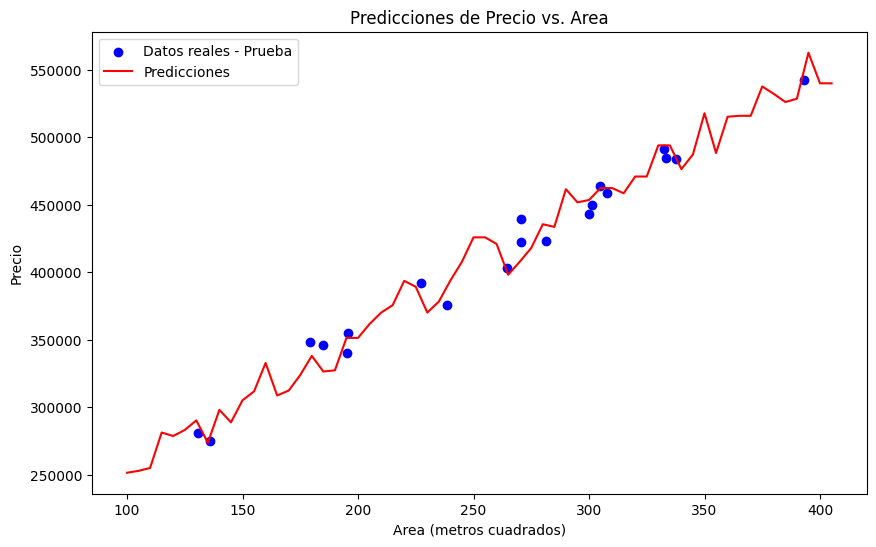

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un arreglo de áreas entre 110 y 300 con un paso de 5
nuevas_areas = np.arange(100, 410, 5)

# Realizar predicciones para cada valor en el arreglo
predicciones = regression_tree.predict(nuevas_areas.reshape(-1, 1))

# Visualizar el gráfico de dispersión junto con las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales - Prueba')
plt.plot(nuevas_areas, predicciones, color='red', label='Predicciones')
plt.xlabel("Area (metros cuadrados)")
plt.ylabel("Precio")
plt.title("Predicciones de Precio vs. Area")
plt.legend()
plt.show()


Vemos an el visual anterior como se ajustan los datos usando el modelo de regresion de decision tree

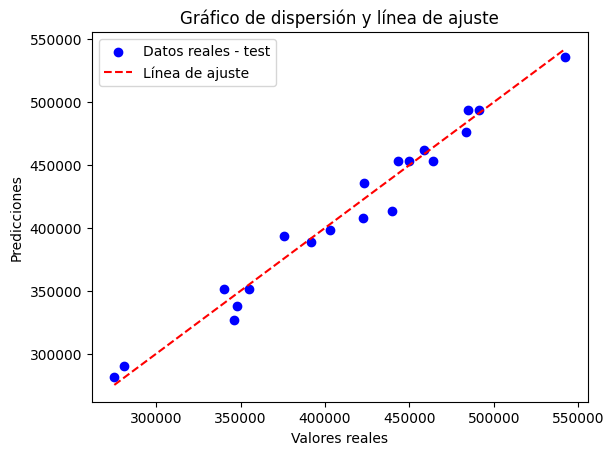

In [32]:
import matplotlib.pyplot as plt

# Gráfico de dispersión
plt.scatter(y_test, y_pred, color='blue', label='Datos reales - test')

# Línea recta de ajuste
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea de ajuste')

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de dispersión y línea de ajuste")
plt.legend()
plt.show()


In [34]:
min(y_test)

275259.65328031644

In [35]:
max(y_test)

542255.4234507723